<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/classical-ml/linear-regression-from-first-principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Vishal Gopalkrishna**

# **Linear Regression — From First Principles**

---



# **What is Supervised Learning?**

Supervised learning is a type of machine learning where:

- We are work with input-output pairs
- The model learns a relationship *(or a mapping function)* from inputs (X) to outputs (y)

Formally:

We want to create a function:

f : X → y

Where:
- X = Features (independent variables)
- y = Target (dependent variable)

So that, when we get new features or unseen features the functions we have created(*or the model*) will give us a good prediction.

Example:
Predict house price based on area.

We can create a function f: Area (X) → Price (y), based on historical data. And, when we want to predict future price values, can can use current Area(X) data to predict it.

# **What Is Linear Regression?**


Linear Regression tries to model the relationship between input features and output using a linear function.

For one feature:

ŷ = w x + b

Where:
- w = weight (slope)
- b = bias (intercept)
- ŷ = predicted value

**Goal: Find w and b such that predictions are as close as possible to true values.**

*Mainly, Linear regression is different because it draws the best straight line to predict a number, while many other algorithms use curves, rules, or complex patterns to make predictions.*

# **Creating a Realistic Synthetic Dataset**(Optional)

Instead of using a real or anonimised dataset, we will generate data from an actual linear process. This allows us to understand the concept clearly, observe covergence behavious of our model and compare learned parameters with true parameters.

True underlying model:

y = 3x + 7 + noise

Where:
- True weight (w*) = 3
- True bias (b*) = 7
- Noise ~ Normal(0, σ²)



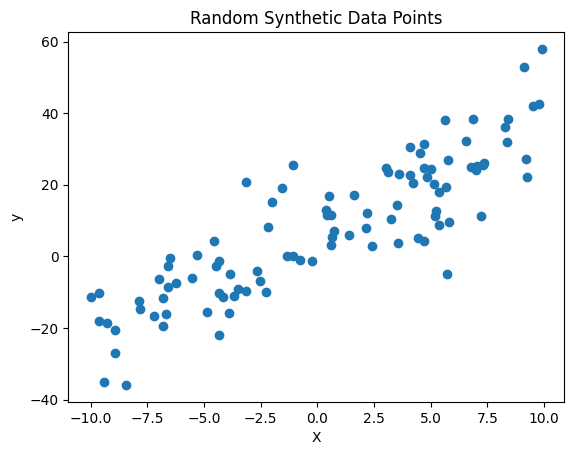

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(197)  # for reproducibility

# Number of data points
m = 100

# Generate feature values
X = np.random.uniform(-10, 10, m)

# True parameters
true_w = 3
true_b = 7

# Add Gaussian noise
noise = np.random.normal(0, 10, m)

# Generate data points
y = true_w * X + true_b + noise

# Visualize
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Synthetic Data Points")
plt.show()

Now we have a dataset where, for each value of x in the range [-10, 10], there is a corresponding y value.

Our goal is to learn the main pattern or underlying relationship between x and y so that we can predict the output for unseen inputs — for example, estimating y when x = 11 or even x = -11.

---

Before we proceed to build the linear model,
We will split this dataset into traning and test data:

- Training set → Used to learn parameters (w, b)
- Test set → Used to evaluate performance on unseen data

In [9]:
# Train/Test Split
from sklearn.model_selection import train_test_split

# reshape because sklearn expects 2D features
X_reshaped = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=123
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 80
Test size: 20


# **Goal of Linear Regression**

Our objective in Linear Regression is to estimate the optimal parameters
**(w, b)** that best explain the relationship between input features and the target.

**In simple terms, we want to find the line that best fits the data — the one that stays as close as possible to all the data points overall.**

We know a straight line is given by the equation:

**ŷ = wx + b**

But we do NOT know the true values of w and b.

Given:
- Training data
**X = {x₁, x₂, ..., xₘ} &
y = {y₁, y₂, ..., yₘ}**

We want to find parameters that minimize prediction error.

**In other words: We are searching for the parameters w and b that make our straight line through the data points as close as possible to the true data.**

We want to minimize the difference between:

Actual value **(yᵢ)**
Predicted value **(ŷᵢ)**

Once we find optimal parameters (w*, b*),
we can use them to make predictions on unseen data.

# **Visualizing Different Lines by Changing Weights**

To understand what "best fit" means, we will:

- Plot 6 different lines on the same dataset
- **Each line uses a different (w, b)**
- One line will be close to the true parameters
- The others will clearly underfit or misfit

We will also compute the MSE for each line.

This helps us visually and mathematically understand
why some parameter choices are better than others.

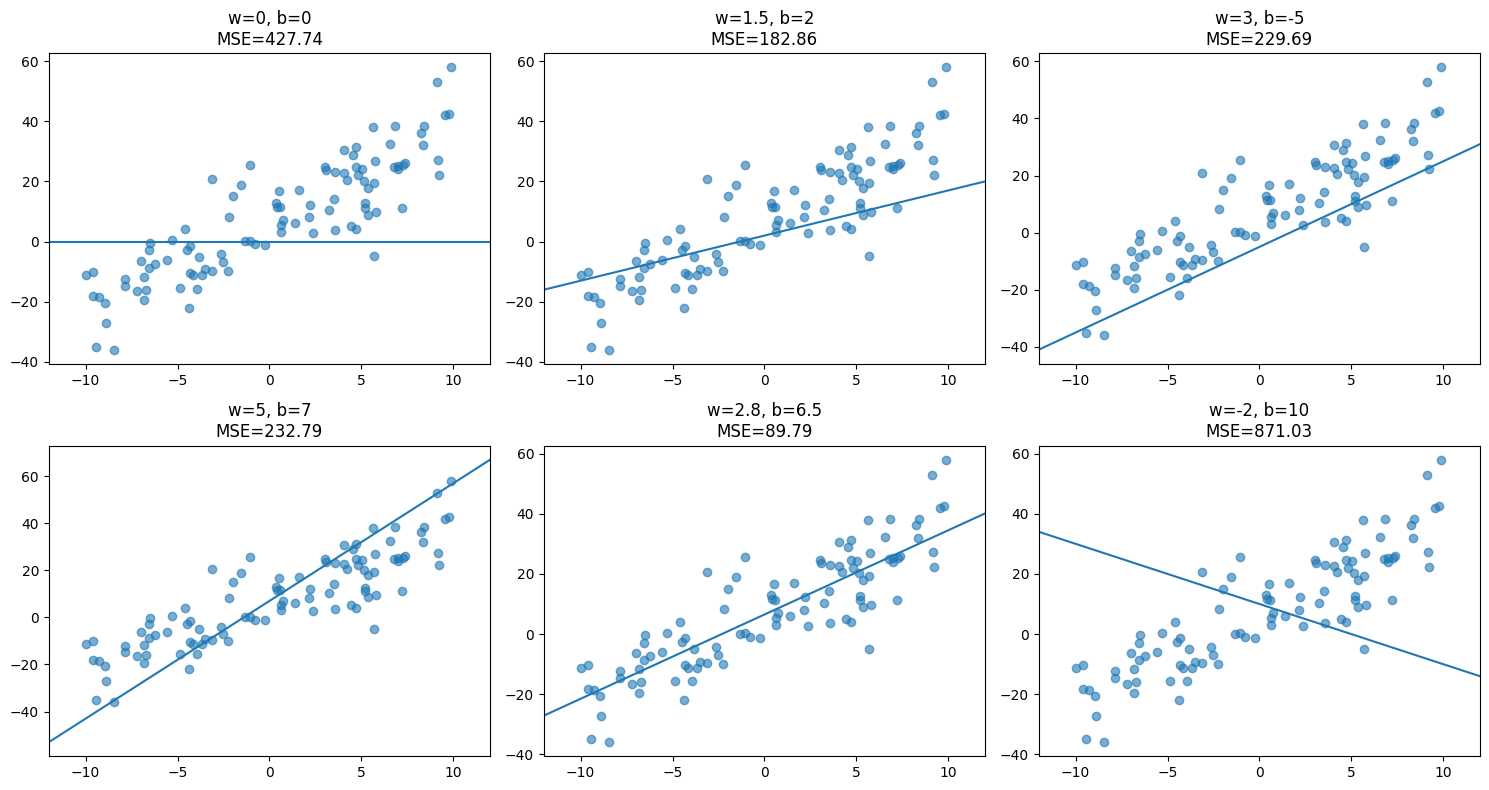

In [10]:
# Candidate parameter sets
parameter_sets = [
    (0, 0),          # very poor fit
    (1.5, 2),        # weak slope
    (3, -5),         # correct slope, wrong intercept
    (5, 7),          # too steep
    (2.8, 6.5),      # close to true (3, 7) but not exact
    (-2, 10)         # completely wrong direction
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

m = len(X)

for i, (w, b) in enumerate(parameter_sets):
    ax = axes[i]

    y_pred = w * X + b
    loss = (1/m) * np.sum((y - y_pred)**2)

    x_line = np.linspace(-12, 12, 100)
    y_line = w * x_line + b

    ax.scatter(X, y, alpha=0.6)
    ax.plot(x_line, y_line)
    ax.set_title(f"w={w}, b={b}\nMSE={loss:.2f}")
    ax.set_xlim(-12, 12)

plt.tight_layout()
plt.show()

Observe:

- Some lines clearly do not represent the data pattern.
- Some lines are closer to the overall trend.
- The line with the smallest MSE is the best fit among these candidates.

This demonstrates that:

"Best line" does not mean passing through every point.
It means minimizing the overall squared error across all data points.

# **Loss Function (Mean Squared Error)**

**Mean Squared Error (MSE)** is the average of how far our predictions are from the real answers.


We define the loss using **Mean Squared Error (MSE)**:

\[
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
\]\

Substituting the prediction \( \hat{y}_i = w x_i + b \):

\[
L(w, b) = \frac{1}{m} \sum_{i=1}^{m} \left(y_i - (w x_i + b)\right)^2
\]\

### Why do we square the errors?

- It penalizes larger errors more heavily.
- It ensures the loss is always non-negative.
- It is differentiable, which makes optimization using gradient descent possible.